<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_04/h)_TensorFlow_Subclassed_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def generate_data(n_samples=1000):
    x1 = np.random.uniform(-5, 5, n_samples)
    x2 = np.random.uniform(-5, 5, n_samples)
    x3 = np.random.uniform(-5, 5, n_samples)

    y = 2 * np.sin(x1) + 0.5 * x2**2 + 0.3 * x3**3 + np.cos(x1 * x2) + np.random.normal(0, 0.2, n_samples)

    X = np.column_stack((x1, x2, x3)).astype(np.float32)
    y = y.reshape(-1, 1).astype(np.float32)
    return X, y

X_train, y_train = generate_data()


In [3]:
class CustomModel(tf.keras.Model):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense2 = tf.keras.layers.Dense(32, activation='relu')
        self.out = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.out(x)

model = CustomModel()


In [4]:
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 227.1742
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 182.5692
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 124.0527
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 69.1266
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 42.6138
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 41.6548
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 36.0863
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34.4843
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35.7906
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32.6170
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33.7685
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31.2146
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.6955
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.1206
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

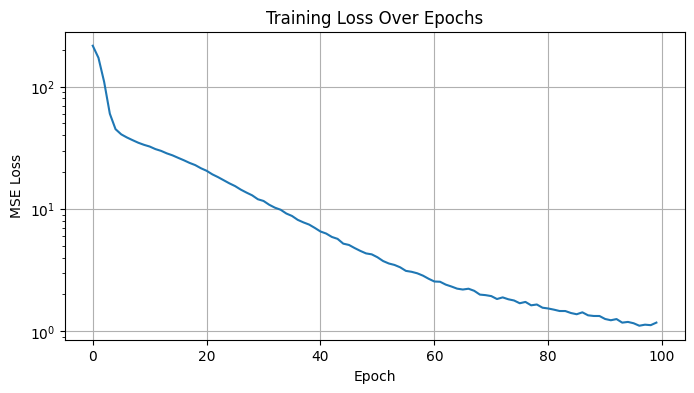

In [5]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'])
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.yscale("log")
plt.grid(True)
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


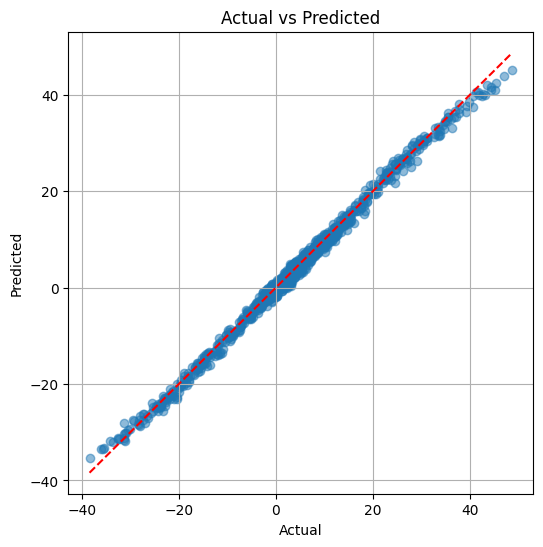

In [6]:
y_pred = model.predict(X_train)

plt.figure(figsize=(6, 6))
plt.scatter(y_train, y_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()


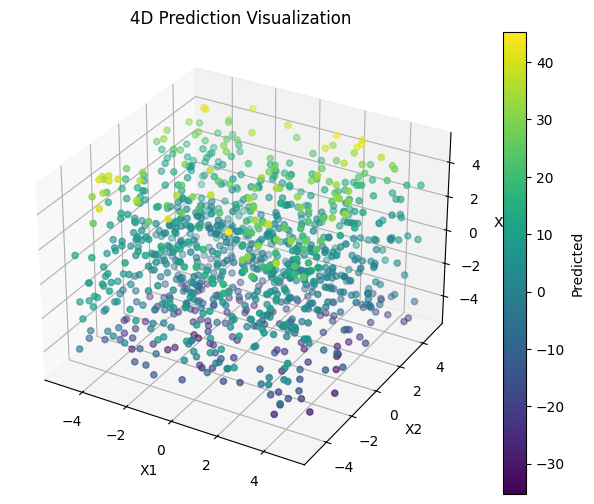

In [7]:
def plot_4d_predictions(X, y_pred):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_pred[:, 0], cmap='viridis')
    plt.colorbar(sc, label="Predicted")
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("X3")
    ax.set_title("4D Prediction Visualization")
    plt.show()

plot_4d_predictions(X_train, y_pred)


In [8]:
def predict_custom(model, x1, x2, x3):
    sample = np.array([[x1, x2, x3]], dtype=np.float32)
    return model(sample).numpy()[0][0]

test_points = [(-4, -4, -4), (0, 0, 0), (4, 4, 4)]
for x1, x2, x3 in test_points:
    pred = predict_custom(model, x1, x2, x3)
    actual = 2 * np.sin(x1) + 0.5 * x2**2 + 0.3 * x3**3 + np.cos(x1 * x2)
    print(f"Input: ({x1}, {x2}, {x3}) → Prediction: {pred:.3f}, Actual: {actual:.3f}")


Input: (-4, -4, -4) → Prediction: -10.468, Actual: -10.644
Input: (0, 0, 0) → Prediction: -1.374, Actual: 1.000
Input: (4, 4, 4) → Prediction: 24.381, Actual: 24.729
